In [48]:
import pandas as pd
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression


### Carregar e visualizar os dados - Regressão

In [49]:
df = pd.read_csv('datasets\colesterol.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [51]:
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

### Calcular PPS - Regressão 

In [52]:
# Calcular PPS entre as variáveis
pps_matrix_reg = pps.matrix(df)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Id,Id,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,Id,Idade,0.000000,regression,True,mean absolute error,15.0980,20.404000,DecisionTreeRegressor()
2,Id,Peso,0.000000,regression,True,mean absolute error,16.9711,23.962600,DecisionTreeRegressor()
3,Id,Altura,0.000000,regression,True,mean absolute error,7.6850,10.385000,DecisionTreeRegressor()
4,Id,Colesterol,0.000000,regression,True,mean absolute error,40.1725,56.973750,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
191,Nível de Atividade_Moderado,Fumante_Não,0.000000,regression,True,mean absolute error,0.3670,0.464215,DecisionTreeRegressor()
192,Nível de Atividade_Moderado,Fumante_Sim,0.000000,regression,True,mean absolute error,0.3670,0.464215,DecisionTreeRegressor()
193,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000000,regression,True,mean absolute error,0.2740,0.334339,DecisionTreeRegressor()
194,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.218834,regression,True,mean absolute error,0.4280,0.334339,DecisionTreeRegressor()


In [53]:
# Ajustar a matriz 
pps_matrix_reg_pivot = pps_matrix_reg[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

Text(0.5, 1.0, 'PPS entre as variáveis')

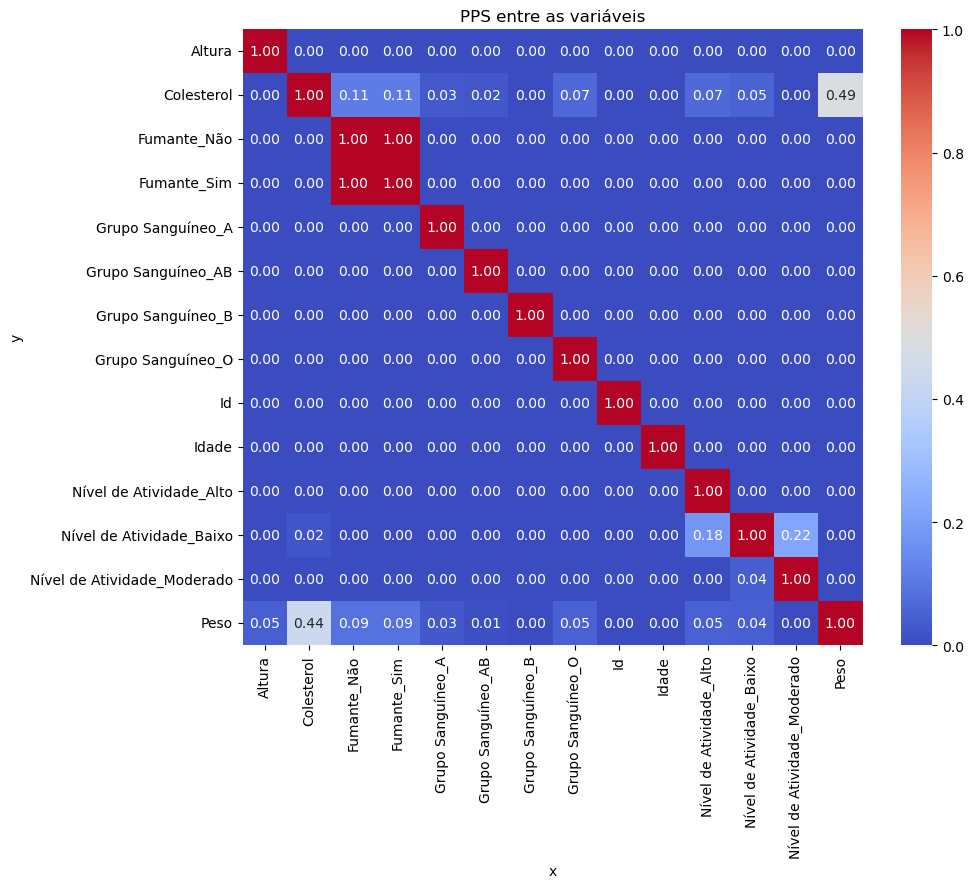

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_reg_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PPS entre as variáveis')

In [55]:
pps.score(df, 'Peso', 'Colesterol')

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': 0.48791093824548304,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.1725,
 'model_score': 20.57189783333333,
 'model': DecisionTreeRegressor()}

## Matriz de correlação Regressão

In [56]:
# Matriz de correlação
corr_matrix_reg = df.corr()
corr_matrix_reg

,Id,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Id,1.000000,-0.032257,-0.047134,-0.010906,-0.042518,-0.050844,-0.006969,-0.007358,0.060274,0.029658,-0.029658,0.000769,0.023377,-0.026039
Idade,-0.032257,1.000000,-0.002648,0.010476,-0.016423,0.052546,-0.058221,0.021215,-0.010426,-0.012127,0.012127,0.057521,-0.002830,-0.053029
Peso,-0.047134,-0.002648,1.000000,0.379190,0.914438,0.208027,0.133005,-0.055518,-0.282051,-0.379051,0.379051,-0.276162,0.286555,-0.040696
Altura,-0.010906,0.010476,0.379190,1.000000,0.013434,-0.000606,-0.049726,0.023007,0.030602,0.000734,-0.000734,-0.021009,0.037647,-0.020239
Colesterol,-0.042518,-0.016423,0.914438,0.013434,1.000000,0.212045,0.181817,-0.075851,-0.317007,-0.423824,0.423824,-0.299483,0.302484,-0.035186
Grupo Sanguíneo_A,-0.050844,0.052546,0.208027,-0.000606,0.212045,1.000000,-0.367053,-0.244755,-0.419010,-0.062120,0.062120,-0.094581,0.058648,0.028784
Grupo Sanguíneo_AB,-0.006969,-0.058221,0.133005,-0.049726,0.181817,-0.367053,1.000000,-0.244133,-0.417945,-0.101386,0.101386,-0.062932,0.069797,-0.014138
Grupo Sanguíneo_B,-0.007358,0.021215,-0.055518,0.023007,-0.075851,-0.244755,-0.244133,1.000000,-0.278690,0.038148,-0.038148,0.042905,-0.051956,0.014366
Grupo Sanguíneo_O,0.060274,-0.010426,-0.282051,0.030602,-0.317007,-0.419010,-0.417945,-0.278690,1.000000,0.126631,-0.126631,0.117460,-0.083173,-0.024565
Fumante_Não,0.029658,-0.012127,-0.379051,0.000734,-0.423824,-0.062120,-0.101386,0.038148,0.126631,1.000000,-1.000000,0.118891,-0.142250,0.037950


Text(0.5, 1.0, 'Matriz de correlação - Modelo Colesterol')

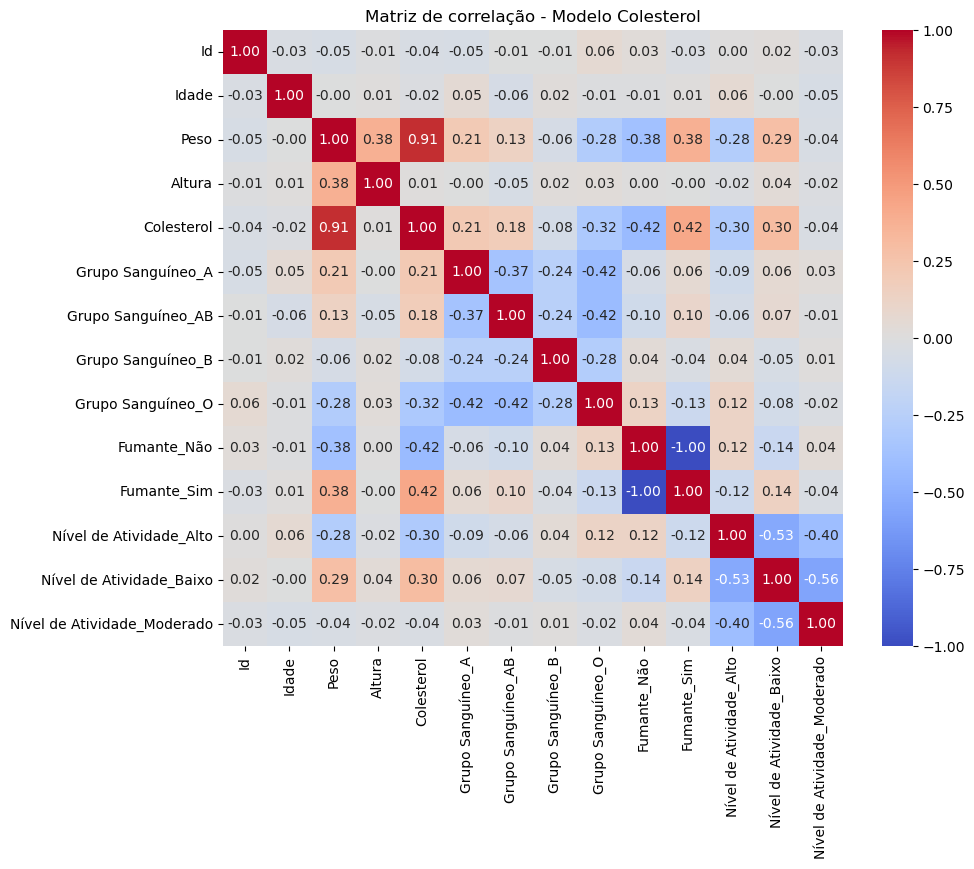

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reg, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação - Modelo Colesterol')

## Treinar modelo linear - Regressão

In [58]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [61]:
model_reg = LinearRegression()
model_reg.fit(X, y)

LinearRegression()

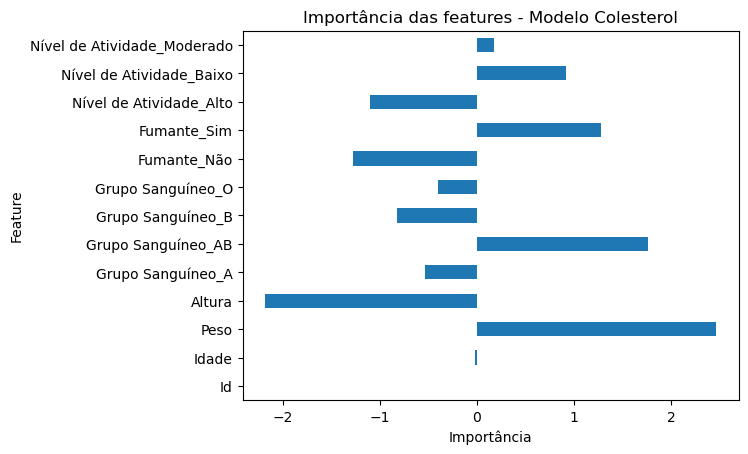

In [62]:
# Avaliar a importância das features com base no coeficiente do modelo
feat_importances_reg = pd.Series(model_reg.coef_, index=X.columns)
feat_importances_reg.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das features - Modelo Colesterol')
plt.show()

## Carregar e preparar dados - Classificação

In [63]:
df2 = pd.read_csv('datasets/fruit.csv')

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [65]:
# Visualizar df2
df2.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [66]:
# Ajustar df2

# Remover a coluna 'A_id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

In [67]:
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Calcular PPS - Classificação

In [68]:
# Calcular PPS entre as variáveis
pps_matrix_class = pps.matrix(df2)
pps_matrix_class

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Size,Size,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Size,Weight,0.000000,regression,True,mean absolute error,1.255674,1.814665,DecisionTreeRegressor()
2,Size,Sweetness,0.000000,regression,True,mean absolute error,1.536197,2.078989,DecisionTreeRegressor()
3,Size,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.538555,DecisionTreeRegressor()
4,Size,Juiciness,0.000000,regression,True,mean absolute error,1.542205,2.160981,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Quality,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.096059,DecisionTreeRegressor()
60,Quality,Juiciness,0.037673,regression,True,mean absolute error,1.542205,1.484105,DecisionTreeRegressor()
61,Quality,Ripeness,0.027576,regression,True,mean absolute error,1.491283,1.450159,DecisionTreeRegressor()
62,Quality,Acidity,0.000000,regression,True,mean absolute error,1.689354,1.690692,DecisionTreeRegressor()


In [69]:
# Ajustar a matriz 
pps_matrix_class_pivot = pps_matrix_class[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_matrix_class_pivot

x,Acidity,Crunchiness,Juiciness,Quality,Ripeness,Size,Sweetness,Weight
y,,,,,,,,
Acidity,1.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Crunchiness,0.0,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Juiciness,0.0,0.000000,1.0000,0.037673,0.00000,0.000000,0.000000,0.000000
Quality,0.0,0.053106,0.1002,1.000000,0.09018,0.035822,0.086172,0.043337
Ripeness,0.0,0.000000,0.0000,0.027576,1.00000,0.000000,0.000000,0.000000
Size,0.0,0.000000,0.0000,0.034400,0.00000,1.000000,0.000000,0.000000
Sweetness,0.0,0.000000,0.0000,0.023585,0.00000,0.000000,1.000000,0.000000
Weight,0.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,1.000000


Text(0.5, 1.0, 'PPS entre as variáveis - Qualidade de frutas')

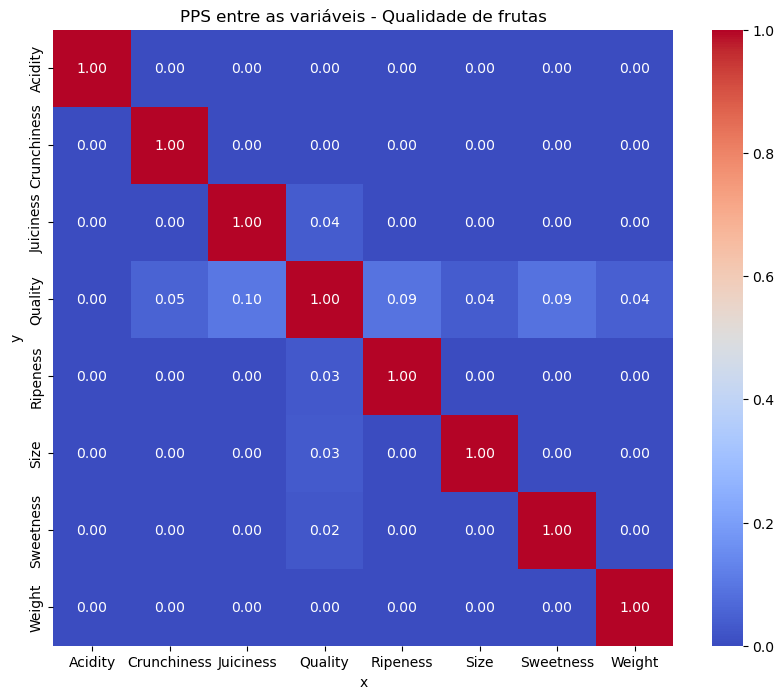

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix_class_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PPS entre as variáveis - Qualidade de frutas')

In [71]:
pps.score(df2, 'Size', 'Quality')

{'x': 'Size',
 'y': 'Quality',
 'ppscore': 0.035821643286573224,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.499,
 'model_score': 0.48112499999999997,
 'model': DecisionTreeRegressor()}

## Matriz de correlação Classificação

In [72]:
# Matriz de correlação
corr_matrix_class = df2.corr()
corr_matrix_class

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


Text(0.5, 1.0, 'Matriz de correlação - Modelo Qualidade de Frutas')

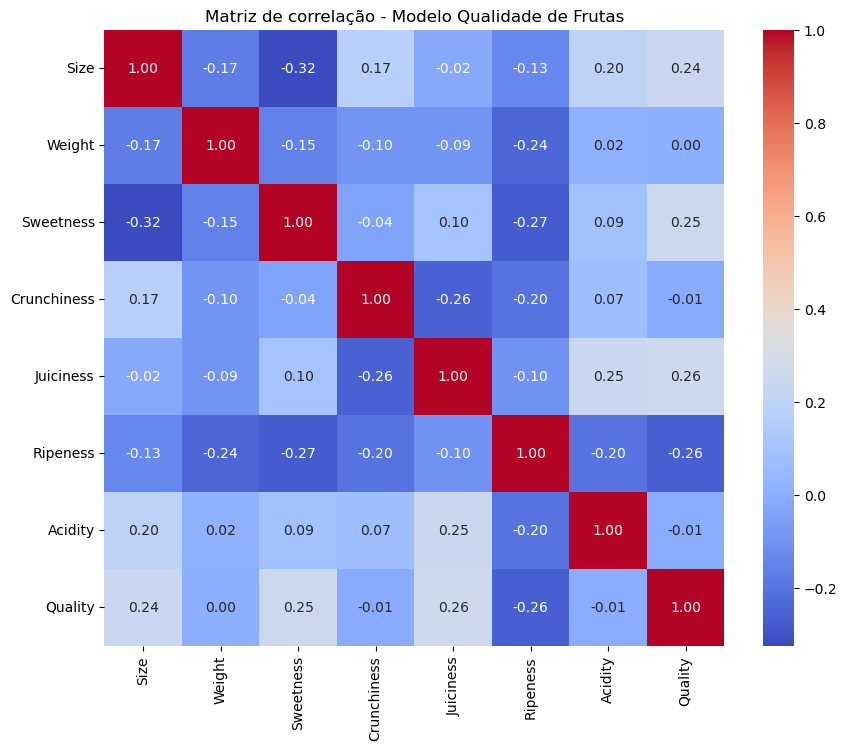

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_class, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação - Modelo Qualidade de Frutas')

## Treinar modelo Regressão Logística

In [75]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [76]:
model_lr = LogisticRegression()
model_lr.fit(X, y)

LogisticRegression()

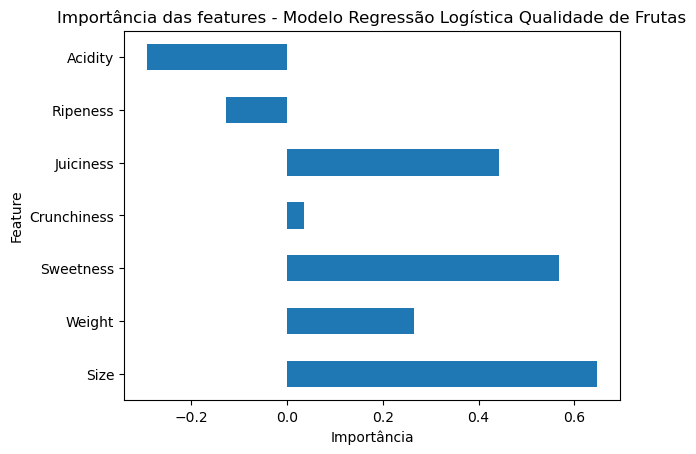

In [78]:
# Avaliar a importância das features com base no coeficiente do modelo
feat_importances_class= pd.Series(model_lr.coef_[0], index=X.columns)
feat_importances_class.plot(kind='barh')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das features - Modelo Regressão Logística Qualidade de Frutas')
plt.show()